In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import glob as glob
import os
import arviz as az

In [34]:
seed=np.arange(0,500,2)
frame_skip=4
dt_ckf=0.025
dt_control=0.1
N_steps=1000
move_radars = ["no-move_radars","move_radars"]
remove_tmp_images = ["remove_tmp_images"]
save_images = ["no-save_images"]

In [35]:
experiment_number = 7

In [36]:
if experiment_number == 3:
    N_radar = 4
    title = f"4 Radar - 4 Target"
elif experiment_number == 2 or experiment_number==7:
    N_radar=6
    title = f"6 Radar - 3 Target" 
elif experiment_number == 1 or experiment_number==8 or  experiment_number==9:
    N_radar=3
    title = f"3 Radar - 4 Target"

In [37]:
def get_rmse_array(filepath):
    results_mv_radar = sorted(list(glob.iglob(filepath+"*/*rmse*")))

    # print(results_mv_radar)

    rmse_array = []
    for rmse_file in results_mv_radar:
        rmse_array_i = np.genfromtxt(rmse_file,delimiter=",",skip_header=1)
        rmse_array.append(rmse_array_i[:600])

    rmse_array = np.stack(rmse_array)

    k = rmse_array[:,:600,0].mean(axis=0)
    rmse = rmse_array[:,:600,1]


    rmse = np.sqrt((rmse**2) / (N_radar*6))

    
    return k,rmse

In [38]:
def get_hz_array(filepath):
    results_mv_radar = sorted(list(glob.iglob(filepath+"*/*hz*")))

    # print(results_mv_radar)

    hz_array = []
    for rmse_file in results_mv_radar:
        hz_i = np.genfromtxt(rmse_file,delimiter=",",skip_header=1)
        hz_i = hz_i[hz_i!=0]
        hz_array.append(hz_i[:600])

    hz = np.stack(hz_array)
    
    return hz

In [39]:
experiment_name = os.path.join(f"Experiment{experiment_number}_SFIM",f"N_radar={N_radar}-{move_radars[1]}")
results_savepath = "results"
filepath = os.path.join(results_savepath,experiment_name)

k,rmse_move_sfim = get_rmse_array(filepath)
print(len(rmse_move_sfim))

250


In [40]:
# experiment_name = os.path.join(f"Experiment4_SFIM",f"N_radar={N_radar}-{move_radars[1]}")
# results_savepath = "results"
# filepath = os.path.join(results_savepath,experiment_name)

# hz_array = get_hz_array(filepath)

In [41]:
# experiment_name = os.path.join(f"Experiment4_SFIM",f"N_radar={N_radar}-{move_radars[1]}")
# results_savepath = "results"
# filepath = os.path.join(results_savepath,experiment_name)

# k,rmse_move_sfim_fast = get_rmse_array(filepath)
# print(len(rmse_move_sfim_fast))

# plt.figure()
# hz_array
# az.plot_density(data = hz_array.mean(axis=1),colors="b")
# plt.show()

# plt.figure(figsize=(5,5))
# az.plot_hdi(k, np.expand_dims(rmse_move_sfim_fast,axis=0),hdi_prob=0.8,smooth=False,color='red',fill_kwargs={'alpha': 0.2})
# plt.plot(np.quantile(rmse_move_sfim_fast,q=0.5,axis=0), linewidth=2,color="red",label='SFIM Mobile Radar 26 Hz') #mean curve.
# az.plot_hdi(k, np.expand_dims(rmse_move_sfim,axis=0),hdi_prob=0.8,smooth=False,color='blue',fill_kwargs={'alpha': 0.2})
# plt.plot(np.quantile(rmse_move_sfim,q=0.5,axis=0), linewidth=2,color="blue",label='SFIM Mobile Radar 10-15 Hz') #mean curve.
# plt.xlabel("Time Step",fontsize=15)
# plt.ylabel('RMSE $(\chi^{T_{1:M}},\\hat{\chi}^{T_{1:M}})$',fontsize=15)
# # plt.ylabel("$x^2$")
# plt.legend(loc="upper right",fontsize=12)
# # plt.title("3 Radars - 4 Targets",fontsize=20)
# plt.title(title,fontsize=15)

# plt.savefig(os.path.join("results",f"rmse_fast{experiment_number}_compare.pdf"))

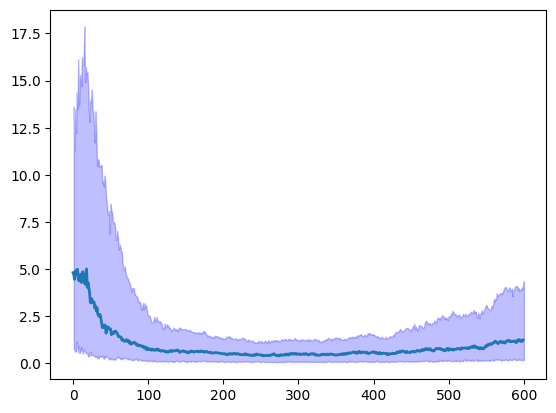

In [42]:
under_line = np.quantile(rmse_move_sfim,0.1,axis=0) #np.clip(rmse.std(axis=0)*-1.96,a_min=0,a_max=np.inf)
over_line = np.quantile(rmse_move_sfim,0.9,axis=0) #rmse.std(axis=0)*1.96

plt.plot(np.quantile(rmse_move_sfim,q=0.5,axis=0), linewidth=2) #mean curve.
plt.fill_between(k, under_line, over_line, color='b', alpha=.25) #std curves.

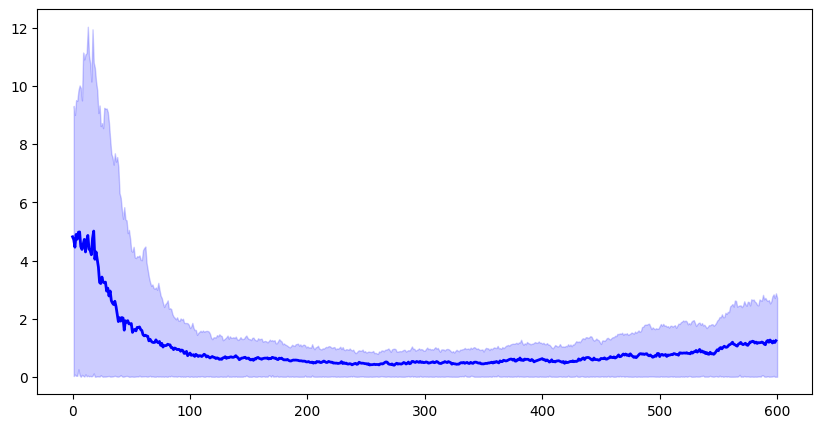

In [43]:
plt.figure(figsize=(10,5))
az.plot_hdi(k, np.expand_dims(rmse_move_sfim,axis=0),hdi_prob=0.8,smooth=False,color='blue',fill_kwargs={'alpha': 0.2})
plt.plot(np.quantile(rmse_move_sfim,q=0.5,axis=0), linewidth=2,color="blue",label='SFIM Mobile Radar') #mean curve.

In [44]:
experiment_name = os.path.join(f"Experiment{experiment_number}_PFIM",f"N_radar={N_radar}-{move_radars[1]}")
results_savepath = "results"
filepath = os.path.join(results_savepath,experiment_name)

k,rmse_move_pfim = get_rmse_array(filepath)
print(len(rmse_move_pfim))

250


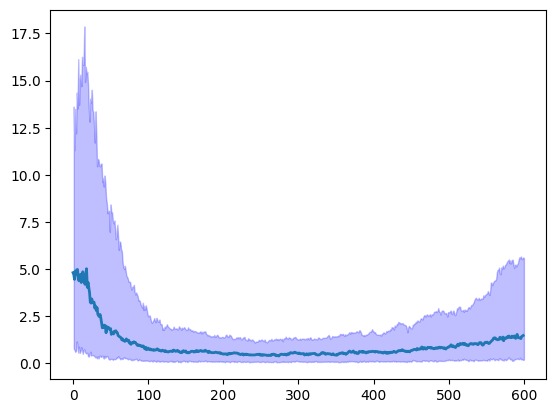

In [45]:
under_line = np.quantile(rmse_move_pfim,0.1,axis=0) #np.clip(rmse.std(axis=0)*-1.96,a_min=0,a_max=np.inf)
over_line = np.quantile(rmse_move_pfim,0.9,axis=0) #rmse.std(axis=0)*1.96

plt.plot(np.quantile(rmse_move_pfim,q=0.5,axis=0), linewidth=2) #mean curve.
plt.fill_between(k, under_line, over_line, color='b', alpha=.25) #std curves.

In [46]:
experiment_name = os.path.join(f"Experiment{experiment_number}_PFIM_bad",f"N_radar={N_radar}-{move_radars[1]}")
results_savepath = "results"
filepath = os.path.join(results_savepath,experiment_name)

k,rmse_move_pfim_bad = get_rmse_array(filepath)
print(len(rmse_move_pfim))

250


In [47]:
experiment_name = os.path.join(f"Experiment{experiment_number}_SFIM_bad",f"N_radar={N_radar}-{move_radars[1]}")
results_savepath = "results"
filepath = os.path.join(results_savepath,experiment_name)

k,rmse_move_sfim_bad = get_rmse_array(filepath)
print(len(rmse_move_sfim_bad))

250


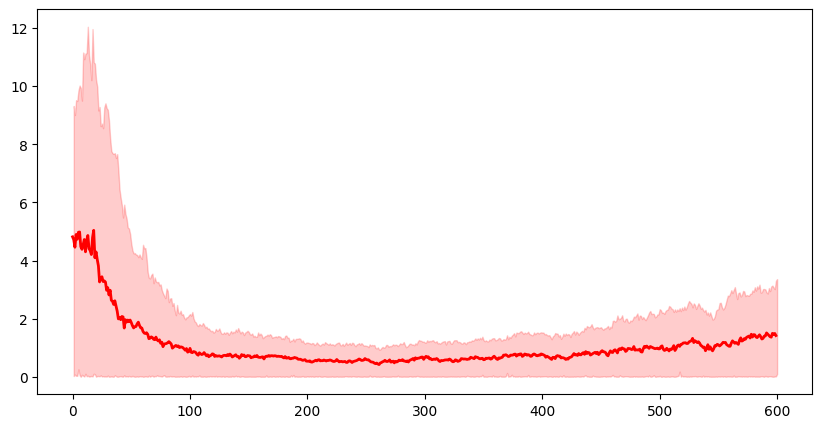

In [48]:
plt.figure(figsize=(10,5))
az.plot_hdi(k, np.expand_dims(rmse_move_sfim_bad,axis=0),hdi_prob=0.8,smooth=False,color='red',fill_kwargs={'alpha': 0.2})
plt.plot(np.quantile(rmse_move_sfim_bad,q=0.5,axis=0), linewidth=2,color="red",label='SFIM Bad Mobile Radar') #mean curve.

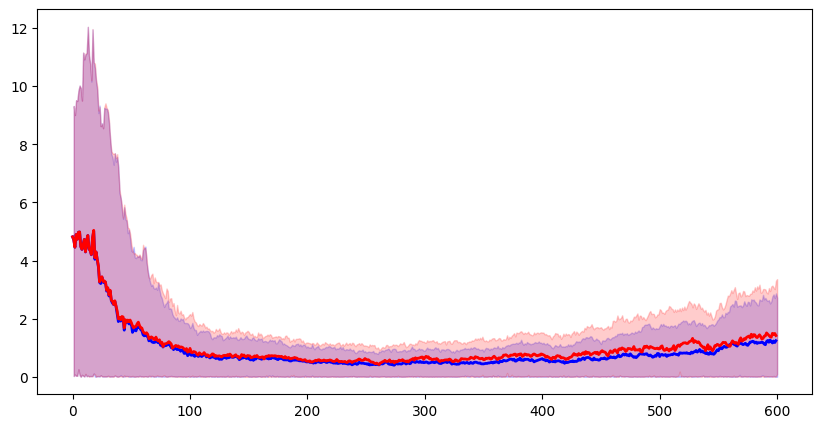

In [49]:
plt.figure(figsize=(10,5))
az.plot_hdi(k, np.expand_dims(rmse_move_sfim,axis=0),hdi_prob=0.8,smooth=False,color='blue',fill_kwargs={'alpha': 0.2})
plt.plot(np.quantile(rmse_move_sfim,q=0.5,axis=0), linewidth=2,color="blue",label='SFIM Mobile Radar') #mean curve.
az.plot_hdi(k, np.expand_dims(rmse_move_sfim_bad,axis=0),hdi_prob=0.8,smooth=False,color='red',fill_kwargs={'alpha': 0.2})
plt.plot(np.quantile(rmse_move_sfim_bad,q=0.5,axis=0), linewidth=2,color="red",label='SFIM Bad Mobile Radar') #mean curve.

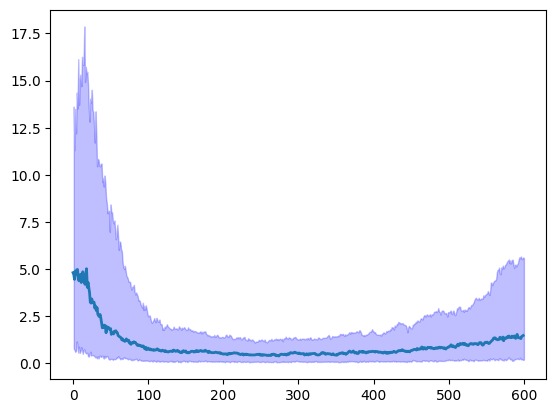

In [50]:
under_line = np.quantile(rmse_move_pfim,0.1,axis=0) #np.clip(rmse.std(axis=0)*-1.96,a_min=0,a_max=np.inf)
over_line = np.quantile(rmse_move_pfim,0.9,axis=0) #rmse.std(axis=0)*1.96

plt.plot(np.quantile(rmse_move_pfim,q=0.5,axis=0), linewidth=2) #mean curve.
plt.fill_between(k, under_line, over_line, color='b', alpha=.25) #std curves.

In [51]:
# under_line_move = np.quantile(rmse_move,0.1,axis=0) #np.clip(rmse.std(axis=0)*-1.96,a_min=0,a_max=np.inf)
# over_line_move = np.quantile(rmse_move,0.9,axis=0) #rmse.std(axis=0)*1.96

# plt.plot(np.quantile(rmse_move,q=0.5,axis=0), linewidth=2,label="SFIM Median") #mean curve.
# plt.fill_between(k, under_line_move, over_line_move, color='b', alpha=.25,label="SFIM Credible Interval") #std curves.

# under_line_nomove = np.quantile(rmse_move_pcrlb,0.1,axis=0) #np.clip(rmse.std(axis=0)*-1.96,a_min=0,a_max=np.inf)
# over_line_nomove = np.quantile(rmse_move_pcrlb,0.9,axis=0) #rmse.std(axis=0)*1.96

# plt.plot(np.quantile(rmse_move_pcrlb,q=0.5,axis=0), linewidth=2,label="PFIM Median") #mean curve.
# plt.fill_between(k, under_line_nomove, over_line_nomove, color='r', alpha=.25,label="PFIM Credible Interval") #std curves.
# plt.xlabel("Time Step")
# plt.ylabel("RMSE")
# plt.legend(loc="upper center")
# plt.savefig(os.path.join("results","N_radars=3,SFIMvsPCRLB.pdf"))

In [52]:
experiment_name = os.path.join(f"Experiment{experiment_number}_SFIM",f"N_radar={N_radar}-{move_radars[0]}")
results_savepath = "results"
filepath = os.path.join(results_savepath,experiment_name)

k,rmse_nomove = get_rmse_array(filepath)
print(len(rmse_nomove))

250


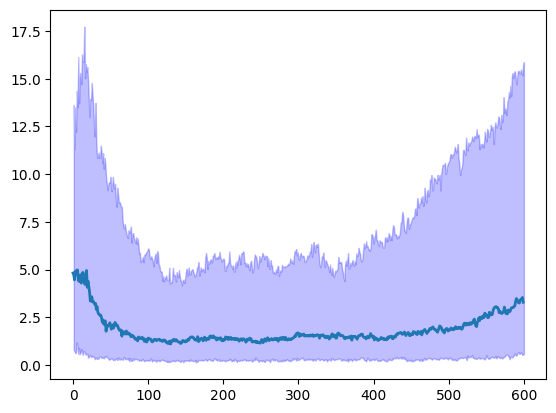

In [53]:
under_line = np.quantile(rmse_nomove,0.1,axis=0) #np.clip(rmse.std(axis=0)*-1.96,a_min=0,a_max=np.inf)
over_line = np.quantile(rmse_nomove,0.9,axis=0) #rmse.std(axis=0)*1.96

plt.plot(np.quantile(rmse_nomove,q=0.5,axis=0), linewidth=2) #mean curve.
plt.fill_between(k, under_line, over_line, color='b', alpha=.25) #std curves.

In [54]:
# under_line_move = np.quantile(rmse_move,0.1,axis=0) #np.clip(rmse.std(axis=0)*-1.96,a_min=0,a_max=np.inf)
# over_line_move = np.quantile(rmse_move,0.9,axis=0) #rmse.std(axis=0)*1.96

# plt.plot(np.quantile(rmse_move,q=0.5,axis=0), linewidth=2,label="Move Median") #mean curve.
# plt.fill_between(k, under_line_move, over_line_move, color='b', alpha=.25,label="Move Credible Interval") #std curves.

# under_line_nomove = np.quantile(rmse_nomove,0.1,axis=0) #np.clip(rmse.std(axis=0)*-1.96,a_min=0,a_max=np.inf)
# over_line_nomove = np.quantile(rmse_nomove,0.9,axis=0) #rmse.std(axis=0)*1.96

# plt.plot(np.quantile(rmse_nomove,q=0.5,axis=0), linewidth=2,label="No Move Median") #mean curve.
# plt.fill_between(k, under_line_nomove, over_line_nomove, color='r', alpha=.25,label="No Move Credible Interval") #std curves.
# plt.xlabel("Time Step")
# plt.ylabel("RMSE")
# plt.legend(loc="upper left")
# plt.savefig(os.path.join("results","N_radars=3,SFIM.pdf"))

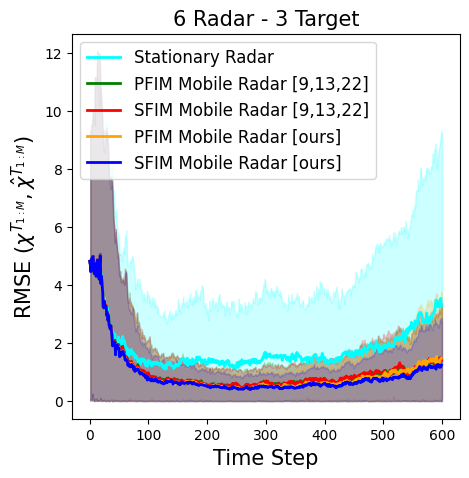

In [55]:
plt.figure(figsize=(5,5))
az.plot_hdi(k, np.expand_dims(rmse_nomove,axis=0),hdi_prob=0.8,smooth=False,color='cyan',fill_kwargs={'alpha': 0.2})
plt.plot(np.quantile(rmse_nomove,q=0.5,axis=0), linewidth=2,color="cyan",label='Stationary Radar') #mean curve.
az.plot_hdi(k, np.expand_dims(rmse_move_pfim_bad,axis=0),hdi_prob=0.8,smooth=False,color='green',fill_kwargs={'alpha': 0.2})
plt.plot(np.quantile(rmse_move_pfim_bad,q=0.5,axis=0), linewidth=2,color="green",label='PFIM Mobile Radar [9,13,22]') #mean curve.
az.plot_hdi(k, np.expand_dims(rmse_move_sfim_bad,axis=0),hdi_prob=0.8,smooth=False,color='red',fill_kwargs={'alpha': 0.2})
plt.plot(np.quantile(rmse_move_sfim_bad,q=0.5,axis=0), linewidth=2,color="red",label='SFIM Mobile Radar [9,13,22]') #mean curve.
az.plot_hdi(k, np.expand_dims(rmse_move_pfim,axis=0),hdi_prob=0.8,smooth=False,color='orange',fill_kwargs={'alpha': 0.2})
plt.plot(np.quantile(rmse_move_pfim,q=0.5,axis=0), linewidth=2,color="orange",label='PFIM Mobile Radar [ours]') #mean curve.
az.plot_hdi(k, np.expand_dims(rmse_move_sfim,axis=0),hdi_prob=0.8,smooth=False,color='blue',fill_kwargs={'alpha': 0.2})
plt.plot(np.quantile(rmse_move_sfim,q=0.5,axis=0), linewidth=2,color="blue",label='SFIM Mobile Radar [ours]') #mean curve.

plt.xlabel("Time Step",fontsize=15)
plt.ylabel('RMSE $(\chi^{T_{1:M}},\\hat{\chi}^{T_{1:M}})$',fontsize=15)
# plt.ylabel("$x^2$")
plt.legend(loc="upper left",fontsize=12)
# plt.title("3 Radars - 4 Targets",fontsize=20)
plt.title(title,fontsize=15)

plt.savefig(os.path.join("results",f"rmse_overlayed{experiment_number}.pdf"))

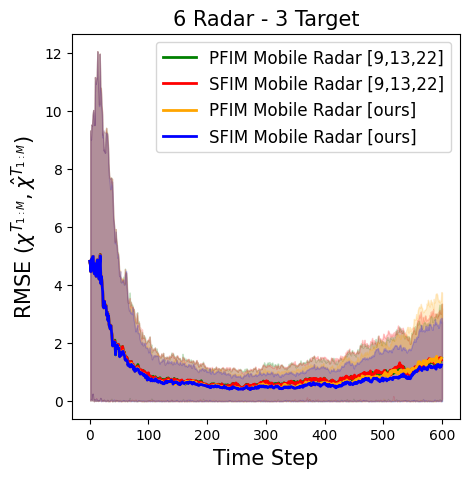

In [57]:
plt.figure(figsize=(5,5))
hdi_interval = 0.8
az.plot_hdi(k, np.expand_dims(rmse_move_pfim_bad,axis=0),hdi_prob=hdi_interval,smooth=False,color='green',fill_kwargs={'alpha': 0.2})
plt.plot(np.quantile(rmse_move_pfim_bad,q=0.5,axis=0), linewidth=2,color="green",label='PFIM Mobile Radar [9,13,22]') #mean curve.
az.plot_hdi(k, np.expand_dims(rmse_move_sfim_bad,axis=0),hdi_prob=hdi_interval,smooth=False,color='red',fill_kwargs={'alpha': 0.2})
plt.plot(np.quantile(rmse_move_sfim_bad,q=0.5,axis=0), linewidth=2,color="red",label='SFIM Mobile Radar [9,13,22]') #mean curve.
az.plot_hdi(k, np.expand_dims(rmse_move_pfim,axis=0),hdi_prob=hdi_interval,smooth=False,color='orange',fill_kwargs={'alpha': 0.2})
plt.plot(np.quantile(rmse_move_pfim,q=0.5,axis=0), linewidth=2,color="orange",label='PFIM Mobile Radar [ours]') #mean curve.
az.plot_hdi(k, np.expand_dims(rmse_move_sfim,axis=0),hdi_prob=hdi_interval,smooth=False,color='blue',fill_kwargs={'alpha': 0.2})
plt.plot(np.quantile(rmse_move_sfim,q=0.5,axis=0), linewidth=2,color="blue",label='SFIM Mobile Radar [ours]') #mean curve.

plt.xlabel("Time Step",fontsize=15)
plt.ylabel('RMSE $(\chi^{T_{1:M}},\\hat{\chi}^{T_{1:M}})$',fontsize=15)
# plt.ylabel("$x^2$")
plt.legend(loc="upper right",fontsize=12)
plt.title(title,fontsize=15)
plt.savefig(os.path.join("results",f"rmse_overlayed_sfimbad{experiment_number}.pdf")) # 

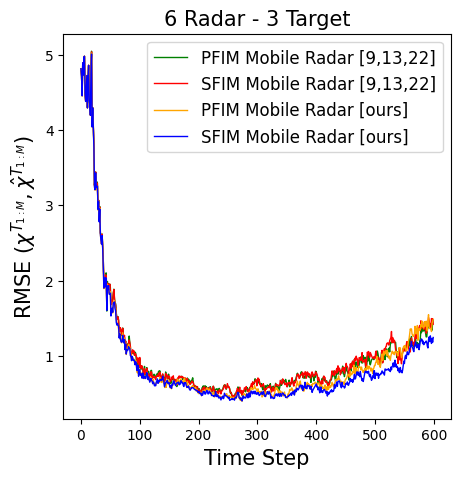

In [58]:
plt.figure(figsize=(5,5))
# az.plot_hdi(k, np.expand_dims(rmse_move_pfim_bad,axis=0),hdi_prob=0.8,smooth=False,color='green',fill_kwargs={'alpha': 0.2})
plt.plot(np.quantile(rmse_move_pfim_bad,q=0.5,axis=0), linewidth=1,color="green",label='PFIM Mobile Radar [9,13,22]') #mean curve.
# az.plot_hdi(k, np.expand_dims(rmse_move_sfim_bad,axis=0),hdi_prob=0.8,smooth=False,color='red',fill_kwargs={'alpha': 0.2})
plt.plot(np.quantile(rmse_move_sfim_bad,q=0.5,axis=0), linewidth=1,color="red",label='SFIM Mobile Radar [9,13,22]') #mean curve.
# az.plot_hdi(k, np.expand_dims(rmse_move_pfim,axis=0),hdi_prob=0.8,smooth=False,color='orange',fill_kwargs={'alpha': 0.2})
plt.plot(np.quantile(rmse_move_pfim,q=0.5,axis=0), linewidth=1,color="orange",label='PFIM Mobile Radar [ours]') #mean curve.
# az.plot_hdi(k, np.expand_dims(rmse_move_sfim,axis=0),hdi_prob=0.8,smooth=False,color='blue',fill_kwargs={'alpha': 0.2})
plt.plot(np.quantile(rmse_move_sfim,q=0.5,axis=0), linewidth=1,color="blue",label='SFIM Mobile Radar [ours]') #mean curve.

plt.xlabel("Time Step",fontsize=15)
plt.ylabel('RMSE $(\chi^{T_{1:M}},\\hat{\chi}^{T_{1:M}})$',fontsize=15)
# plt.ylabel("$x^2$")
plt.legend(loc="upper right",fontsize=12)
plt.title(title,fontsize=15)
plt.savefig(os.path.join("results",f"rmse_overlayed_sfimbad_nohdi{experiment_number}.pdf"))

In [30]:
print("SFIM med: ",np.median(rmse_move_sfim))
print("PFIM med: ",np.median(rmse_move_pfim))
print("SFIM bad med: ",np.median(rmse_move_sfim_bad))
print("PFIM bad med: ",np.median(rmse_move_pfim_bad))
print("No move: ",np.median(rmse_nomove))

SFIM med:  1.653232497049904
PFIM med:  1.811546134618399
SFIM bad med:  2.760081110625582
PFIM bad med:  2.7170904601178227
No move:  10.988221348649148


In [31]:
print("SFIM hdi upper: ",np.mean(rmse_move_sfim))
print("PFIM hdi upper: ",np.mean(rmse_move_pfim))
print("SFIM bad hdi upper: ",np.mean(rmse_move_sfim_bad))
print("PFIM bad hdi upper: ",np.mean(rmse_move_pfim_bad))
print("No move: ",np.mean(rmse_nomove))

SFIM hdi upper:  7.768367306518769
PFIM hdi upper:  9.760984711988133
SFIM bad hdi upper:  9.560006870586403
PFIM bad hdi upper:  9.223119912435415
No move:  24.379299305876433


In [32]:
print("SFIM hdi upper: ",az.hdi(rmse_move_sfim.ravel(),hdi_prob=0.8)[1])
print("PFIM hdi upper: ",az.hdi(rmse_move_pfim.ravel(),hdi_prob=0.8)[1])
print("SFIM hdi upper: ",az.hdi(rmse_move_sfim_bad.ravel(),hdi_prob=0.8)[1])
print("PFIM hdi upper: ",az.hdi(rmse_move_pfim_bad.ravel(),hdi_prob=0.8)[1])
print("No move: ",az.hdi(rmse_nomove.ravel(),hdi_prob=0.8)[1])

SFIM hdi upper:  6.616140550657023
PFIM hdi upper:  8.366629572205358
SFIM hdi upper:  11.8272952850489
PFIM hdi upper:  11.158486989507981
No move:  38.073345780129685


## Plot ECDF

In [279]:
from statsmodels.distributions.empirical_distribution import ECDF

In [229]:
pfim_bad_ecdf = ECDF(rmse_move_pfim_bad.ravel())
sfim_bad_ecdf = ECDF(rmse_move_sfim_bad.ravel())
pfim_ecdf = ECDF(rmse_move_pfim.ravel())
sfim_ecdf = ECDF(rmse_move_sfim.ravel())
nomove_ecdf = ECDF(rmse_nomove.ravel())

In [230]:
error = np.linspace(0,8,2000)

In [231]:
pfim_bad_ecdf = pfim_bad_ecdf(error)
sfim_bad_ecdf = sfim_bad_ecdf(error)
pfim_ecdf = pfim_ecdf(error)
sfim_ecdf = sfim_ecdf(error)
nomove_ecdf = nomove_ecdf(error)

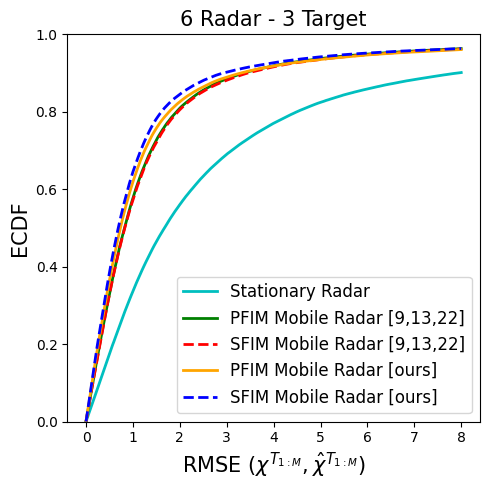

In [232]:
plt.figure(figsize=(5,5))
plt.plot(error,nomove_ecdf,"c-",linewidth=2,label="Stationary Radar")
plt.plot(error,pfim_bad_ecdf,"g-",linewidth=2,label="PFIM Mobile Radar [9,13,22]")
plt.plot(error,sfim_bad_ecdf,"r--",linewidth=2,label="SFIM Mobile Radar [9,13,22]")
plt.plot(error,pfim_ecdf,color="orange",linewidth=2,linestyle="-",label="PFIM Mobile Radar [ours]")
plt.plot(error,sfim_ecdf,'b--',linewidth=2,label="SFIM Mobile Radar [ours]")
plt.xlabel('RMSE $(\chi^{T_{1:M}},\\hat{\chi}^{T_{1:M}})$',fontsize=15)
plt.ylabel("ECDF",fontsize=15)
plt.title(title,fontsize=15)
plt.legend(fontsize=12)
plt.ylim([0,1])
plt.tight_layout()
plt.savefig(os.path.join("results",f"ecdf{experiment_number}.pdf")) # 

## Plot Overlapped Results

In [ ]:
folder_path = r"/home/mlpotter/Documents/Northeastern/Research/OptimalTrackingAndControl/src_range_publish"
experiment_name = "test_SFIMbad_e1_123"
results_savepath = "results"
filepath = os.path.join(results_savepath,experiment_name)

k,rmse_sfimbad = get_rmse_array(filepath)
print(len(rmse_sfimbad))

In [ ]:
folder_path = r"/home/mlpotter/Documents/Northeastern/Research/OptimalTrackingAndControl/src_range_publish"
experiment_name = "test_SFIM_e1_123"
results_savepath = "results"
filepath = os.path.join(results_savepath,experiment_name)

k,rmse_sfim = get_rmse_array(filepath)
print(len(rmse_sfim))

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(rmse_sfimbad.ravel(), linewidth=2,color="red",label='SFIM (constant covariance) [9,13,22]') #mean curve.
plt.plot(rmse_sfim.ravel(), linewidth=2,color="blue",label='SFIM Mobile Radar [ours]') #mean curve.

plt.xlabel("Time Step",fontsize=15)
plt.ylabel('RMSE $\sqrt{|| \chi^{T_{1:M}} - \\hat{\chi}^{T_{1:M}} ||}$',fontsize=15)
# plt.ylabel("$x^2$")
plt.legend(loc="upper left",fontsize=15)
plt.title("3 Radars - 4 Targets",fontsize=20)
plt.savefig(os.path.join("results","rmse_mse_realization1.pdf"))

In [ ]:
folder_path = r"/home/mlpotter/Documents/Northeastern/Research/OptimalTrackingAndControl/src_range_publish"
experiment_name = "test_SFIMbad_e2_123"
results_savepath = "results"
filepath = os.path.join(results_savepath,experiment_name)

k,rmse_sfimbad = get_rmse_array(filepath)
print(len(rmse_sfimbad))

In [ ]:
folder_path = r"/home/mlpotter/Documents/Northeastern/Research/OptimalTrackingAndControl/src_range_publish"
experiment_name = "test_SFIM_e2_123"
results_savepath = "results"
filepath = os.path.join(results_savepath,experiment_name)

k,rmse_sfim = get_rmse_array(filepath)
print(len(rmse_sfim))

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(rmse_sfimbad.ravel(), linewidth=2,color="red",label='SFIM (constant covariance) [9,13,22]') #mean curve.
plt.plot(rmse_sfim.ravel(), linewidth=2,color="blue",label='SFIM Mobile Radar [ours]') #mean curve.

plt.xlabel("Time Step",fontsize=15)
plt.ylabel('RMSE $\sqrt{|| \chi^{T_{1:M}} - \\hat{\chi}^{T_{1:M}} ||}$',fontsize=15)
# plt.ylabel("$x^2$")
plt.legend(loc="upper right",fontsize=15)
plt.title("6 Radars - 3 Targets",fontsize=20)
plt.savefig(os.path.join("results","rmse_mse_realization2.pdf"))